In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define Quadratic loss function

In [2]:
def quadratic_loss(x,y):
  return x**2 +10*y**2

Gradient of the loss function

In [3]:
def quadratic_grad(x,y):
  dx = 2*x
  dy = 20*y
  return np.array([dx,dy])


vanilla gradient descent

In [4]:
def vanilla_grad(grad_func,lr,epoches,start_point):
  x,y = start_point
  path = [(x,y)]
  losses = [quadratic_loss(x,y)]

  for _ in range(epoches):
    grad = grad_func(x,y)
    x -= lr*grad[0]
    y -= lr*grad[1]
    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path),losses

Adam_Gradient Descent

In [8]:
def adam_GD(grad_func,lr,beta1,beta2,epsilon,epoches,start_point):

  x,y = start_point
  v = np.array([0.0,0.0])
  m = np.array([0.0,0.0])

  path = [(x,y)]
  losses = [quadratic_loss(x,y)]

  for t in range(1,epoches+1):
    grad = grad_func(x,y)

    v = beta1*v + (1-beta1)*grad
    m = beta2*m + (1-beta2)*grad**2

    v_hat = v/(1-beta1**t)
    m_hat = m/(1-beta2**t)

    x -= lr*v_hat[0]/(np.sqrt(m_hat[0])+epsilon)
    y -= lr*v_hat[1]/(np.sqrt(m_hat[1])+epsilon)
    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path),losses

Visualization of paths

In [6]:
def plot_paths(functions, path, labels, title):
  X,Y = np.meshgrid(np.linspace(-2,2,400),np.linspace(-2,2,400))
  # Changed 'function' to 'functions' to use the passed function for calculation.
  Z = functions(X,Y)

  plt.figure(figsize=(8,6))
  plt.contour(X,Y,Z,levels=50,cmap = 'jet')

  for path,label in zip(path,labels):
    # Convert the path to a NumPy array before slicing
    path_array = np.array(path)
    plt.plot(path_array[:,0],path_array[:,1],label = label)
    plt.scatter(path_array[0,0],path_array[0,1],color='green',label = 'start')
    plt.scatter(path_array[-1,0],path_array[-1,1],color='red',label = 'end')

  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.legend()
  plt.show()

Visualization of losses

In [7]:
def plot_losses(losses, labels, title):
  plt.figure(figsize=(8,6))

  for loss, label in zip(losses, labels):
    plt.plot(loss, label=label)

  plt.title(title)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

Parameters

In [10]:
lr_gd = 0.1
lr_adam = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
epoches = 180
start_point = (1.5,1.5)

Run optimization

In [13]:
path_gd,losses_gd = vanilla_grad(quadratic_grad,lr_gd,epoches,start_point)
path_adam,losses_adam = adam_GD(quadratic_grad,lr_adam,beta1,beta2,epsilon,epoches,start_point)

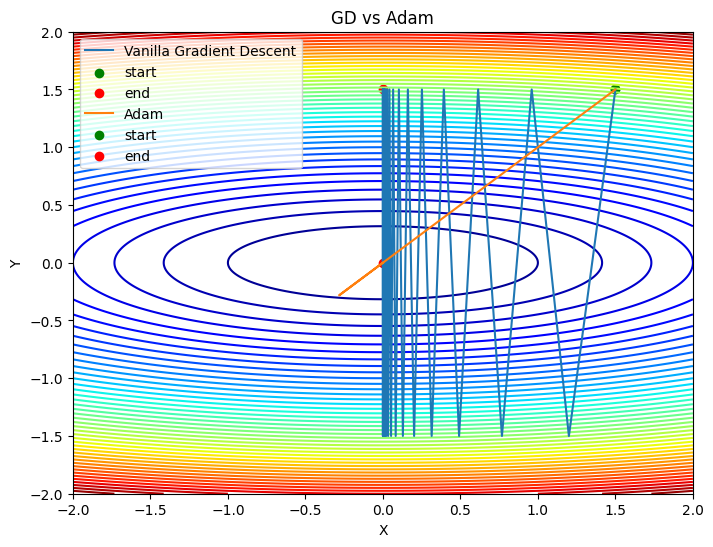

In [14]:
plot_paths(quadratic_loss, [path_gd, path_adam], ['Vanilla Gradient Descent', 'Adam'], 'GD vs Adam')

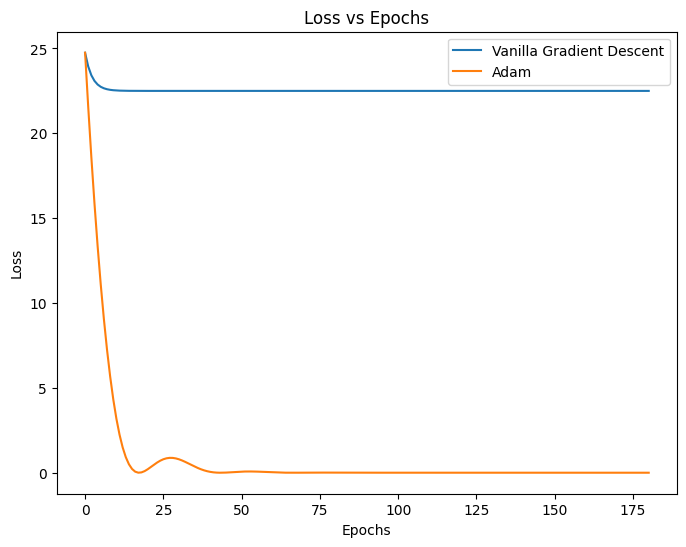

In [15]:
plot_losses([losses_gd, losses_adam], ['Vanilla Gradient Descent', 'Adam'], 'Loss vs Epochs')